<a href="https://colab.research.google.com/github/pantelis/cs634-notebooks/blob/master/Bayesian_update_coin_flip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The [Probabilistic Programming & Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/) book is one of the best hands on resources out there. Below is an instructive example.


# Posterior updates in a coin flipping experiment

Suppose, naively, that you are unsure about the probability of heads in a coin flip (spoiler alert: it's 50%). You believe there is some true underlying ratio, call it p, but have no prior opinion on what p might be.

We begin to flip a coin, and record the observations: either H or T. This is our observed x. An interesting question to ask is how our inference changes as we observe more and more x? More specifically, what do our posterior probabilities look like when we have little x, versus when we have lots of x.

Below we plot a sequence of updating posterior probabilities as we observe increasing amounts of x (coin flips).

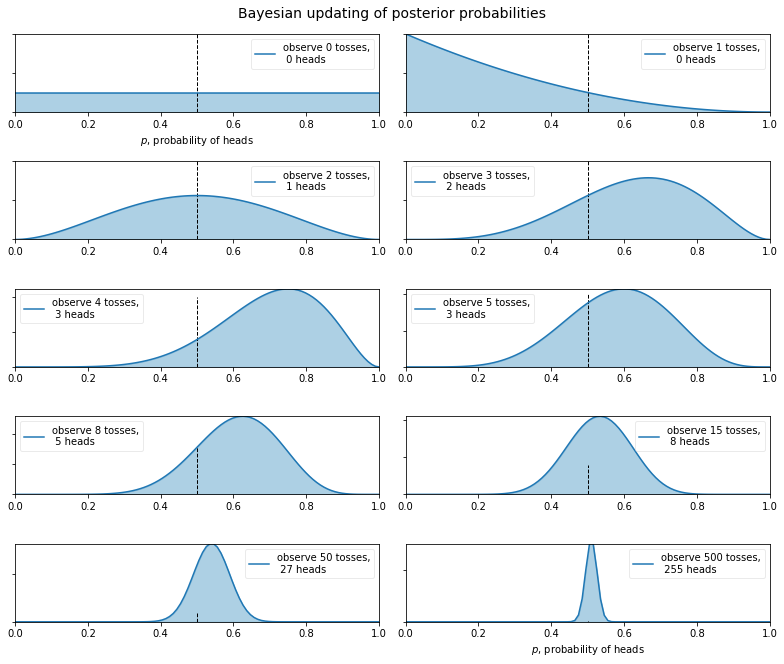

In [42]:
%matplotlib inline
import math
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

# the conjugate prior distribution for bernouli aka Beta distribution p(mu|a,b)
# see below for details
dist = stats.beta

# bayes theorem
# p(mu|x) = p(x|mu)p(mu|a,b) / sum_over_{a,b}(p(x|mu)p(mu|a,b))
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

# x is a binary variable {0,1} drawn from the bernoulli distribution p(x|mu) with parameter mu*=0.5
# where we interprete the heads as "1" and the tails outcome as "0"
# we **dont know** the parameter mu* 
x = stats.bernoulli.rvs(0.5, size=n_trials[-1])
#p_x = stats.bernoulli(0.5)
#print("all 500 tosses = ", x)

# mu is the posterior that can take values between 0 and 1 (here we create a vector of length 100 of possible 
# values of such parameter (i.e. resolution 0.01). 
mu = np.linspace(0, 1, 100)

# Iterate over the number of trials (N) and each trial is indexed by k 
for k, N in enumerate(n_trials):
    # For each trial plot the corresponding posterior
    sx = plt.subplot(len(n_trials)//2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    
    # number of heads in this trial (we use the sum to count the number of 1s)
    # print("x(tosses)=", x[:N])
    heads = x[:N].sum()
    #print("number of heads in this trial", heads)
    
    # p(mu|a,b) from the beta distribution 
    # the distribution has two parameters (see Annex B of Bishop). 
    # parameter a = observations of heads 
    # parameter b = observations of tails
    # the 1+ term in both parameters serves the purpose of establishing a uniform prior 
    # when N=0 (x is in this case empty and obviously heads = 0)
    p_mu = dist.pdf(mu, 1+heads, 1+N - heads)
    #print('p_mu = ', p_mu)
    
    # likelihood 
    likelihood = mu**heads * (1-mu)**(N-heads)
    #print('likelihood=',likelihood)
    
    # evidence
    evidence = math.factorial(heads) * math.factorial(N-heads) / math.factorial(1 + N)
    
    #posterior
    posterior = likelihood*p_mu/evidence
    #print('posterior=',posterior)
    
    plt.plot(mu, posterior, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(mu, 0, posterior, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()